# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [27]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math
import dill

expected = dill.load(open('expected','rb'))

results_bisection = expected['bisection']
f = results_bisection[12][2]
a = results_bisection[12][1]


***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

<function matplotlib.pyplot.show(close=None, block=None)>

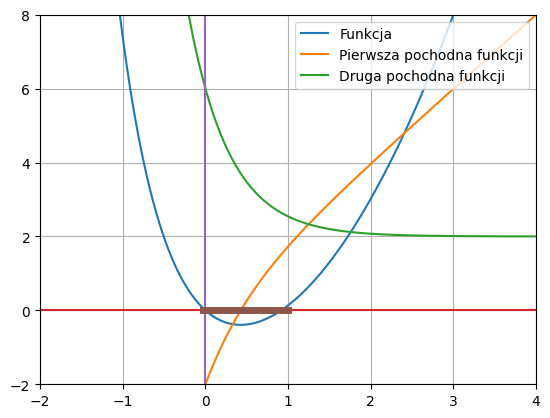

In [28]:
x = np.linspace(-2, 4, 1000)

y_f = main.fun(x)
y_df = main.dfun(x)
y_ddf = main.ddfun(x)

os_x = np.zeros(1000)
os_y = np.linspace(-2, 8, 1000)

plt.plot(x, y_f, label = 'Funkcja')
plt.plot(x, y_df, label = 'Pierwsza pochodna funkcji')
plt.plot(x, y_ddf, label = 'Druga pochodna funkcji')
plt.plot(x, os_x)
plt.plot(os_x, os_y)
#------------------#
a = -0.03
b = 1
przedzial = np.linspace(a, b, 1000)
plt.plot(przedzial, os_x, linewidth = 5)            # Zgrubne okreslenie przedzialu w ktorym znajduja sie miejsca zerowe funkcji
#------------------#
plt.legend()
plt.grid()
plt.xlim(-2, 4)
plt.ylim(-2, 8)
plt.show


***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [29]:
f_root = scipy.optimize.root(main.fun, [a, b])
f_fsolve = scipy.optimize.fsolve(main.fun, [a, b])
print(f_root.x[0], f_root.x[1],  " \n ", f_fsolve)

1.368219988123235e-12 0.9165625831067136  
  [1.36821999e-12 9.16562583e-01]


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [30]:
# Metoda bisekcji

# Z wykresu wiemy, że funkcja ma dwa miejsca zerowe, wiec potrzebujemy dwoch przedzialow oraz dwoch wywolan dla nich funkcji obslugujacej metode bisekcji

a_bisect = 0.2
b_bisect = 0.7

# Utworzone zostaja takze dwie listy majace zawierac roznice dla rozwiazan wzgledem zadania 5
blad_x1 = []
blad_x2 = []

epsilon = 1e-10
rozwiazania_bisekcja = []
rozwiazania_bisekcja.append(main.bisection(a, b_bisect, main.fun, epsilon, 100))
rozwiazania_bisekcja.append(main.bisection(a_bisect, b, main.fun, epsilon, 100))

print(rozwiazania_bisekcja)

blad_x1.append(abs(rozwiazania_bisekcja[0][0] - f_root.x[0]))
blad_x2.append(abs(rozwiazania_bisekcja[1][0] - f_root.x[1]))

[(3.1432132710925384e-11, 32), (0.916562583111227, 31)]


In [31]:
# Metoda siecznych

# Podobnie jak w poprzedniej metodzie, znajdywane jest tutaj tylko pierwsze znalezione na danym przedziale miejsce zerowe dla kazdego wywolania funkcji
# wiec uzyjemy po raz kolejny wczesniej utworzonych zmiennych a_bisect oraz b_bisect

rozwiazania_sieczne = []
rozwiazania_sieczne.append(main.secant(a, b_bisect, main.fun, epsilon, 100))
rozwiazania_sieczne.append(main.secant(a_bisect, b, main.fun, epsilon, 100))

print(rozwiazania_sieczne)

blad_x1.append(abs(rozwiazania_sieczne[0][0] - f_root.x[0]))
blad_x2.append(abs(rozwiazania_sieczne[1][0] - f_root.x[1]))

[(-1.267884481804381e-17, 100), (0.9165625831056982, 100)]


In [32]:
# Metoda Newtona

# Sytuacja z poprzednic przykladow sie powtarza(funckja znajduje tylko jedno miejsce zerowe) jednak w tym przypadku zmienna b_bisect musi byc
# zastapiona inna liczba, aby spelniac warunki skorzystania z tej metody

# Z jakiegos powodu przy wywolaniu funkcji uzywajac zmiennych, otrzymywalem wartosci None, wiec wstawilem zwykle wartosci liczbowe

rozwiazania_newton = []
rozwiazania_newton.append(main.newton(main.fun, main.dfun, main.ddfun, -0.3, 0.1 , 1e-10, 100))
rozwiazania_newton.append(main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, 100))

print(rozwiazania_newton)

blad_x1.append(abs(rozwiazania_newton[0][0] - f_root.x[0]))
blad_x2.append(abs(rozwiazania_newton[1][0] - f_root.x[1]))



[(-1.3919851596325877e-17, 5), (0.9165625831056982, 4)]


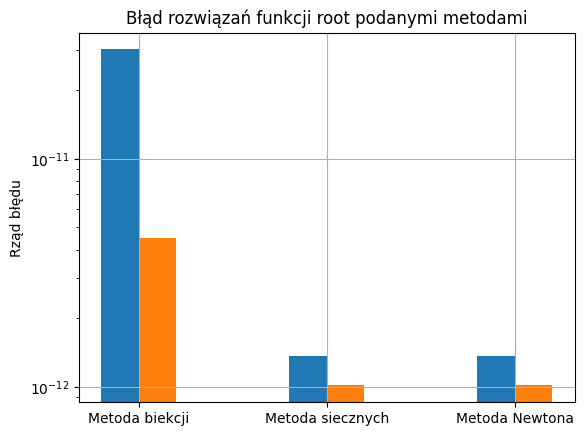

[3.006391272280215e-11, 1.368232666968053e-12, 1.3682339079748313e-12]
[4.513389662008649e-12, 1.0154099783221682e-12, 1.0154099783221682e-12]


In [33]:
funs = ['Metoda biekcji', 'Metoda siecznych', 'Metoda Newtona']
width = 0.2
x = np.arange(len(funs))
fig, ax = plt.subplots()

a = ax.bar(x - width/2, blad_x1, width)
b = ax.bar(x + width/2, blad_x2, width)


ax.set_title("Błąd rozwiązań funkcji root podanymi metodami")
ax.set_xticks(x)
ax.set_xticklabels(funs)
ax.set_ylabel('Rząd błędu')
plt.yscale('log')
plt.grid()
plt.show()
print(blad_x1)
print(blad_x2)

In [34]:
# Po doglebnym sprawdzeniu, nie doszukalem sie bledow w kodzie, a mimo tego bledy dla metody siecznych oraz dla metody Newtona sa dokladnie takie same
# Dzieki czemu okazuja sie one njabardziej dokladnymi metodami

402 ns ± 87.8 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
386 ns ± 79.9 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
372 ns ± 5.85 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
376 ns ± 52.5 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
390 ns ± 119 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
363 ns ± 33.3 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
371 ns ± 38.2 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
404 ns ± 103 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
364 ns ± 13.7 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
382 ns ± 91.3 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)


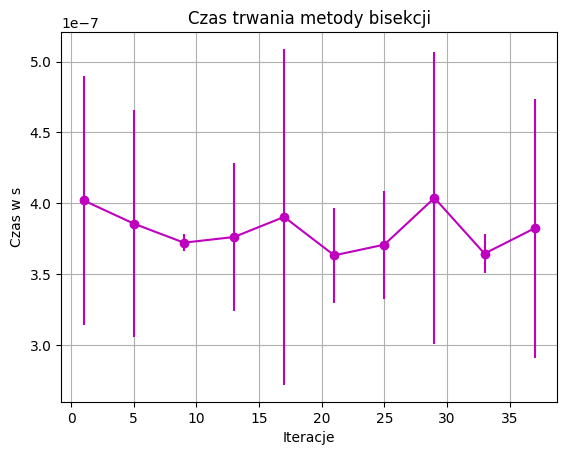

In [36]:
err = []
time = []
x = np.arange(1, 40, 4)
for i in x:
  aver = %timeit -r 100 -n 100 -o main.bisection(a, b_bisect, main.fun, epsilon, iteration = i)
  time.append(aver.average)
  err.append(aver.stdev)

plt.errorbar(x, time, yerr = err, marker = 'o', color = 'm')
plt.xlabel("Iteracje")
plt.ylabel("Czas w s")
plt.title("Czas trwania metody bisekcji")
plt.grid()
plt.show()

493 ns ± 153 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
439 ns ± 159 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 5.52 times longer than the fastest. This could mean that an intermediate result is being cached.
401 ns ± 187 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
455 ns ± 161 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
461 ns ± 131 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 7.49 times longer than the fastest. This could mean that an intermediate result is being cached.
520 ns ± 269 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
441 ns ± 149 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
524 ns ± 131 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 5.07 times longer than the fastest. This could me

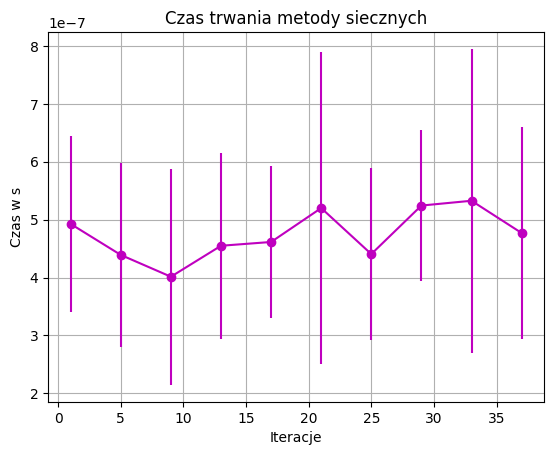

In [39]:
err = []
time = []
x = np.arange(1, 40, 4)
for i in x:
  aver = %timeit -r 100 -n 100 -o main.secant(a, b_bisect, main.fun, epsilon, iteration = i)
  time.append(aver.average)
  err.append(aver.stdev)

plt.errorbar(x, time, yerr = err, marker = 'o', color = 'm')
plt.xlabel("Iteracje")
plt.ylabel("Czas w s")
plt.title("Czas trwania metody siecznych")
plt.grid()
plt.show()

1.59 µs ± 520 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.69 µs ± 503 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.99 µs ± 541 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.6 µs ± 220 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.39 µs ± 152 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.48 µs ± 262 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.37 µs ± 152 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.34 µs ± 33.1 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.42 µs ± 246 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.32 µs ± 77.7 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)


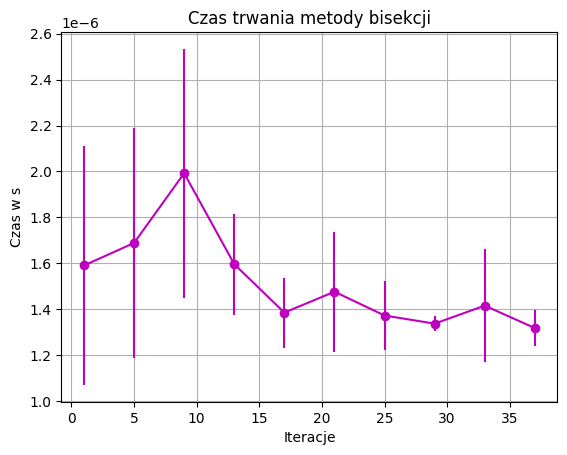

In [41]:
err = []
time = []
x = np.arange(1, 40, 4)
for i in x:
  aver = %timeit -r 100 -n 100 -o main.newton(main.fun, main.dfun, main.ddfun, a, b_bisect, epsilon, iteration = i)
  time.append(aver.average)
  err.append(aver.stdev)

plt.errorbar(x, time, yerr = err, marker = 'o', color = 'm')
plt.xlabel("Iteracje")
plt.ylabel("Czas w s")
plt.title("Czas trwania metody bisekcji")
plt.grid()
plt.show()